<a href="https://colab.research.google.com/github/Maneekul/Senior/blob/main/Port_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and install TA-Lib library
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb'
!wget $url/libta-lib0_$ext -qO libta.deb
!wget $url/ta-lib0-dev_$ext -qO ta.deb
!dpkg -i libta.deb ta.deb
!apt-get install -y -f
!pip install ta-lib


Selecting previously unselected package libta-lib0.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

Reading packa

In [ ]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from ignite.handlers import EarlyStopping

from torch.utils.data import DataLoader, TensorDataset


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers
tickers = ["AAPL", "MSFT", "WMB"]

data = yf.download(tickers, start="2012-01-01", end="2024-01-04") # 2024-01-04  2023-01-01

macd_data = pd.DataFrame()
adx_data = pd.DataFrame()
band_data = pd.DataFrame()
trix_data = pd.DataFrame()
aroon_data = pd.DataFrame()
cci_data = pd.DataFrame()

for i, ticker in enumerate(tickers):
    high = data['High'][ticker]
    low = data['Low'][ticker]
    close = data['Close'][ticker]

    # Calculate MACD
    macd, signal_line, _ = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

    # Calculate ADX
    adx = talib.ADX(high, low, close, timeperiod=14)

    # Calculate Bollinger Bands
    _, middle_band, _ = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2)

    # Calculate TRIX
    trix = talib.TRIX(close, timeperiod=30)   # timeperiod=30

    # Calculate Aroon Indicator
    aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)

    # Calculate CCI
    cci = talib.CCI(high, low, close, timeperiod=14)

    # Add values to the DataFrames
    macd_data[ticker + '_MACD'] = macd
    adx_data[ticker + '_ADX'] = adx
    band_data[ticker + '_BBANDS'] = middle_band
    trix_data[ticker + '_TRIX'] = trix
    aroon_data[ticker + '_AROON_UP'] = aroon_up
    aroon_data[ticker + '_AROON_DOWN'] = aroon_down
    cci_data[ticker + '_CCI'] = cci

macd_data.dropna(inplace=True)
adx_data.dropna(inplace=True)
band_data.dropna(inplace=True)
trix_data.dropna(inplace=True)
aroon_data.dropna(inplace=True)
cci_data.dropna(inplace=True)



[*********************100%%**********************]  3 of 3 completed


In [ ]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers
tickers = ["AAPL", "MSFT", "WMB"]

data = yf.download(tickers, start="2012-01-01", end="2024-01-04") # 2024-01-04  2023-01-01

macd_data = pd.DataFrame()
adx_data = pd.DataFrame()
band_data = pd.DataFrame()
trix_data = pd.DataFrame()
aroon_data = pd.DataFrame()
cci_data = pd.DataFrame()

combine_aapl = pd.DataFrame()
combine_msft = pd.DataFrame()
combine_wmb = pd.DataFrame()



for i, ticker in enumerate(tickers):
    high = data['High'][ticker]
    low = data['Low'][ticker]
    close = data['Close'][ticker]

    # Calculate MACD
    macd, signal_line, _ = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

    # Calculate ADX
    adx = talib.ADX(high, low, close, timeperiod=14)

    # Calculate Bollinger Bands
    _, middle_band, _ = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2)

    # Calculate TRIX
    trix = talib.TRIX(close, timeperiod=30)   # timeperiod=30

    # Calculate Aroon Indicator
    aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)

    # Calculate CCI
    cci = talib.CCI(high, low, close, timeperiod=14)

    # Add values to the DataFrames
    macd_data[ticker + '_MACD'] = macd
    adx_data[ticker + '_ADX'] = adx
    band_data[ticker + '_BBANDS'] = middle_band
    trix_data[ticker + '_TRIX'] = trix
    aroon_data[ticker + '_AROON_UP'] = aroon_up
    aroon_data[ticker + '_AROON_DOWN'] = aroon_down
    cci_data[ticker + '_CCI'] = cci

    combined_aapl = pd.concat([macd_data, adx_data, trix_data, trix_data, aroon_up - aroon_down, cci_data], axis=1)

macd_data.dropna(inplace=True)
adx_data.dropna(inplace=True)
band_data.dropna(inplace=True)
trix_data.dropna(inplace=True)
aroon_data.dropna(inplace=True)
cci_data.dropna(inplace=True)



[*********************100%%**********************]  3 of 3 completed


In [ ]:
import yfinance as yf
import talib
import pandas as pd

# Download data for three stocks
tickers = ["AAPL", "MSFT", "WMB"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-11")

# Extract relevant columns for each stock
close_prices = data['Close']
high = data['High']
low = data['Low']

dfs = {}

# Calculate technical indicators for each stock
for ticker in tickers:
    close_prices_np = close_prices[ticker].to_numpy()
    macd, _, _ = talib.MACD(close_prices_np, fastperiod=12, slowperiod=26, signalperiod=9)
    tri_x = talib.TRIX(close_prices_np, timeperiod=14)
    adx = talib.ADX(high[ticker], low[ticker], close_prices_np, timeperiod=14)
    _, middle_band, _ = talib.BBANDS(close_prices_np, timeperiod=20, nbdevup=2, nbdevdn=2)
    aroon_up, aroon_down = talib.AROON(high[ticker], low[ticker], timeperiod=14)
    cci = talib.CCI(high[ticker], low[ticker], close_prices_np, timeperiod=14)

    # Create a DataFrame for the current stock
    df = pd.DataFrame({
        f"Close_{ticker}": close_prices[ticker],
        f"MACD_{ticker}": macd,
        f"TRIX_{ticker}": tri_x,
        f"ADX_{ticker}": adx,
        f"Middle_Band_{ticker}": middle_band,
        f"Aroon_Diff_{ticker}": aroon_up - aroon_down,
        f"CCI_{ticker}": cci
    })

    # Add the DataFrame to the dictionary
    dfs[ticker] = df

# Concatenate the DataFrames for all stocks
df_combined = pd.concat(list(dfs.values()), axis=1)

# Drop rows with NaN values
df_combined = df_combined.dropna()

# Display the combined DataFrame
df_combined



[*********************100%%**********************]  3 of 3 completed


,Close_AAPL,MACD_AAPL,TRIX_AAPL,ADX_AAPL,Middle_Band_AAPL,Aroon_Diff_AAPL,CCI_AAPL,Close_MSFT,MACD_MSFT,TRIX_MSFT,...,Middle_Band_MSFT,Aroon_Diff_MSFT,CCI_MSFT,Close_WMB,MACD_WMB,TRIX_WMB,ADX_WMB,Middle_Band_WMB,Aroon_Diff_WMB,CCI_WMB
Date,,,,,,,,,,,,,,,,,,,,,
2012-03-28,22.057858,1.039624,0.801123,64.674116,20.528143,-100.000000,107.628796,32.189999,0.356356,0.173637,...,32.195500,35.714286,2.775676,30.680000,0.357788,0.183115,14.852109,30.2850,-42.857143,48.217819
2012-03-29,21.780714,1.005606,0.789517,64.497201,20.644911,-92.857143,82.508755,32.119999,0.321019,0.163083,...,32.187000,35.714286,-63.404151,30.590000,0.340311,0.180878,14.434311,30.3015,-42.857143,6.397861
2012-03-30,21.412500,0.938121,0.768454,63.165384,20.742000,-85.714286,32.987416,32.259998,0.300843,0.152816,...,32.195999,35.714286,-20.446192,30.809999,0.340290,0.178782,15.036304,30.3290,-42.857143,78.590513
2012-04-02,22.093929,0.928916,0.748808,62.267189,20.894625,-78.571429,97.527738,32.290001,0.284001,0.143096,...,32.220500,35.714286,-16.842744,31.059999,0.356339,0.178431,15.595297,30.3645,-35.714286,68.179481
2012-04-03,22.475714,0.941574,0.733726,61.904887,21.071518,-100.000000,185.864495,31.940001,0.239648,0.131253,...,32.239500,85.714286,-87.500034,31.440001,0.395165,0.181801,16.428053,30.4505,-21.428571,89.548449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-04,181.910004,-0.702285,0.081086,27.024740,193.194002,92.857143,-194.721567,367.940002,1.286363,0.070338,...,372.240001,7.142857,-101.287373,35.820000,0.040056,-0.049012,16.593678,35.0820,-100.000000,196.010492
2024-01-05,181.179993,-1.345788,0.038491,28.212745,192.637001,100.000000,-146.963746,367.750000,0.839872,0.057820,...,372.187502,-71.428571,-129.849352,35.549999,0.052282,-0.036582,16.396513,35.0675,-85.714286,80.854864
2024-01-08,185.559998,-1.485219,0.001479,28.113569,192.201501,92.857143,-85.152235,374.690002,1.034105,0.049369,...,372.374501,-64.285714,16.336801,35.650002,0.069243,-0.024695,15.287265,35.1035,-85.714286,23.436780


# My_Stock

In [ ]:
################# Test_Similar_Stock_AAPL #################

#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["AMZN"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_AMZN = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values  AMZN
test_AMZN = test_AMZN.dropna()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
################# Test_Similar_Stock_Of_MSFT #################

#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["META"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_META = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_META = test_META.dropna()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["WMB"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_wmb = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_wmb = test_wmb.dropna()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["MSFT"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_msft = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_msft = test_msft.dropna()



[*********************100%%**********************]  1 of 1 completed


In [ ]:
#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["AAPL"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-26")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_aapl = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_aapl = test_aapl.dropna()



[*********************100%%**********************]  1 of 1 completed


In [ ]:
test_wmb.tail(20)


,Close,MACD,TRIX,ADX,Middle Band,Aroon Diff,CCI
Date,,,,,,,
2023-12-26,35.119999,-0.167180,-0.068665,17.842850,35.4645,42.857143,50.321569
2023-12-27,35.029999,-0.157822,-0.072219,17.112450,35.3995,35.714286,49.694200
2023-12-28,34.930000,-0.156669,-0.074735,16.570392,35.3240,28.571429,27.154897
2023-12-29,34.830002,-0.161958,-0.076947,16.207544,35.2260,21.428571,2.281843
2024-01-02,35.520000,-0.109213,-0.074057,15.227862,35.1380,-85.714286,145.696194
2024-01-03,36.310001,-0.003624,-0.062514,15.834871,35.1040,-92.857143,268.895296
2024-01-04,35.820000,0.040056,-0.049012,16.593678,35.0820,-100.000000,196.010492
2024-01-05,35.549999,0.052282,-0.036582,16.396513,35.0675,-85.714286,80.854864
2024-01-08,35.650002,0.069243,-0.024695,15.287265,35.1035,-85.714286,23.436780


In [ ]:
test_msft.tail(20)

,Close,MACD,TRIX,ADX,Middle Band,Aroon Diff,CCI
Date,,,,,,,
2023-12-26,374.660004,2.727820,0.118492,25.253248,373.331502,7.142857,128.416747
2023-12-27,374.070007,2.623385,0.109840,24.846455,372.900002,7.142857,77.588254
2023-12-28,375.279999,2.608191,0.102938,24.740673,372.721501,7.142857,117.061213
2023-12-29,376.040009,2.627190,0.097748,24.778489,372.578001,7.142857,106.347824
2024-01-02,370.869995,2.199714,0.090375,23.030505,372.396001,7.142857,-62.657639
2024-01-03,370.600006,1.818191,0.081557,21.407376,372.469000,7.142857,-67.404668
2024-01-04,367.940002,1.286363,0.070338,20.221714,372.240001,7.142857,-101.287373
2024-01-05,367.750000,0.839872,0.057820,19.282135,372.187502,-71.428571,-129.849352
2024-01-08,374.690002,1.034105,0.049369,18.218169,372.374501,-64.285714,16.336801


In [ ]:
test_aapl.tail(20)

,Close,MACD,TRIX,ADX,Middle Band,Aroon Diff,CCI
Date,,,,,,,
2023-12-26,193.050003,2.306308,0.239213,29.890795,193.831501,-50.000000,-89.108633
2023-12-27,193.149994,2.029448,0.220833,27.780045,193.969001,57.142857,-116.860552
2023-12-28,193.580002,1.823710,0.202417,26.241072,194.179501,57.142857,-56.848230
2023-12-29,192.529999,1.557975,0.183096,24.532561,194.308501,57.142857,-82.668396
2024-01-02,185.639999,0.782394,0.155148,25.184041,194.028501,78.571429,-267.376531
2024-01-03,184.250000,0.054946,0.120907,25.883132,193.769501,85.714286,-220.274332
2024-01-04,181.910004,-0.702285,0.081086,27.024740,193.194002,92.857143,-194.721567
2024-01-05,181.179993,-1.345788,0.038491,28.212745,192.637001,100.000000,-146.963746
2024-01-08,185.559998,-1.485219,0.001479,28.113569,192.201501,92.857143,-85.152235


In [ ]:
### Buy&Hold ###
BH_msft = (test_msft['Close'].iloc[-1] - test_msft['Close'].iloc[0])
BH_aapl = (test_aapl['Close'].iloc[-1] - test_aapl['Close'].iloc[0])
BH_wmb = (test_wmb['Close'].iloc[-1] - test_wmb['Close'].iloc[0])

print('Buy&Hold_MSFT =',BH_msft)
print('Buy&Hold_AAPL =',BH_aapl)
print('Buy&Hold_WMB =',BH_wmb)


Buy&Hold_MSFT = 370.36999893188477
Buy&Hold_AAPL = 172.44214248657227
Buy&Hold_WMB = 3.3499984741210938


In [ ]:
### Buy&Hold ###
my_wallet = 1_000_000

BH_msft = (test_msft['Close'].iloc[-1] - test_msft['Close'].iloc[0]) * (my_wallet//test_msft['Close'].iloc[0]) + my_wallet
BH_aapl = (test_aapl['Close'].iloc[-1] - test_aapl['Close'].iloc[0]) * (my_wallet//test_aapl['Close'].iloc[0]) + my_wallet
BH_wmb = (test_wmb['Close'].iloc[-1] - test_wmb['Close'].iloc[0])* (my_wallet//test_wmb['Close'].iloc[0]) + my_wallet


print(f'Buy&Hold_MSFT = {BH_msft:,.0f}')
print(f'Buy&Hold_AAPL = {BH_aapl:,.0f}')
print(f'Buy&Hold_WMB = {BH_wmb:,.0f}')

Buy&Hold_MSFT = 12,505,544
Buy&Hold_AAPL = 8,817,665
Buy&Hold_WMB = 1,109,190


# 10y_w/_port

In [ ]:
def wo_port_ADX(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_ADX[num] >= 25    :    #my_MACD[num]  #my_TRIX    my_Middle_Band[num] > my_close[num] or my_MACD[num]>0      my_MACD[num]>0 or  my_ADX[num] > 25
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_ADX[count_day] <= 25   : ## จะขายถ้าเป้น -   my_Middle_Band[count_day] < my_close[count_day] or my_MACD[count_day]<0   my_MACD[count_day] < 0 or my_ADX[count_day] < 25
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet + diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_adx =',my_wallet)


In [ ]:
def wo_port_MACD(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_MACD[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_MACD[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_macd =',my_wallet)

In [ ]:
def wo_port_TRIX(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_TRIX[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_TRIX[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_trix =',my_wallet)

In [ ]:
def wo_port_CCI(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_CCI[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_CCI[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_cci =',my_wallet)

In [ ]:
def wo_port_Middle_Band(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):
    #if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
    #  print("my_money = ",my_wallet)
    #  break

    if my_Middle_Band[num] > my_close[num]:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_Middle_Band[count_day] < my_close[count_day]: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_BB =',my_wallet)

In [ ]:
def wo_port_Aroon_Diff(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  my_TRIX = combined_df['TRIX'].values
  my_CCI = combined_df['CCI'].values
  my_ADX = combined_df['ADX'].values
  my_Middle_Band = combined_df['Middle Band'].values
  my_Aroon_Diff = combined_df['Aroon Diff'].values

  num = 0  ## Choose day or random day
  select_day = my_day[num]

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif my_Aroon_Diff[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      #print(count_day)

      if my_Aroon_Diff[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet + diff_price

        #print('date_to_buy',my_day[num])
        #print('date_to_sell',my_day[count_day])
        #print('buy_price =', buy)
        #print('sell =', next_buy)
        #print('diff_price =',diff_price)
        #print('my_wallet =',my_wallet)
        #print('\n')

        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_aroon=',my_wallet)

In [ ]:
##### buy and hold ######
#Buy&Hold_MSFT = 370.36999893188477
#Buy&Hold_AAPL = 172.44214248657227
#Buy&Hold_WMB = 3.3499984741210938

In [ ]:
wo_port_ADX(test_msft)
wo_port_MACD(test_msft)
wo_port_TRIX(test_msft)
wo_port_CCI(test_msft)
wo_port_Middle_Band(test_msft)
wo_port_Aroon_Diff(test_msft)

my_wallet_adx = 110.85997200012207
my_wallet_macd = 118.13996887207031
my_wallet_trix = 162.79000663757324
my_wallet_cci = 160.39990043640137
my_wallet_BB = 281.7900447845459
my_wallet_aroon= 194.01997756958008


In [ ]:
###########
wo_port_ADX(test_aapl)
wo_port_MACD(test_aapl)
wo_port_TRIX(test_aapl)
wo_port_CCI(test_aapl)
wo_port_Middle_Band(test_aapl)
wo_port_Aroon_Diff(test_aapl)

my_wallet_adx = 145.95105838775635
my_wallet_macd = 100.11427211761475
my_wallet_trix = 102.7471170425415
my_wallet_cci = 135.94788360595703
my_wallet_BB = -17.59289264678955
my_wallet_aroon= -8.99716854095459


In [ ]:
wo_port_ADX(test_wmb)
wo_port_MACD(test_wmb)
wo_port_TRIX(test_wmb)
wo_port_CCI(test_wmb)
wo_port_Middle_Band(test_wmb)
wo_port_Aroon_Diff(test_wmb)

my_wallet_adx = 22.140012741088867
my_wallet_macd = 6.509995460510254
my_wallet_trix = 18.43999671936035
my_wallet_cci = 13.830004692077637
my_wallet_BB = -14.629986763000488
my_wallet_aroon= -1.4300098419189453


#  10y_w_port


In [ ]:
def w_port_MACD(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_MACD[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_MACD[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                #print('date_to_buy',my_day[num])
                #print('date_to_sell',my_day[count_day])
                #print('buy_price =', buy)
                #print('sell =', next_buy)
                #print('diff_price =',diff_price)
                #print("my_port =",my_wallet)
                ##print('my_wallet =',my_wallet)
                #print('\n')
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()





In [ ]:
def w_port_TRIX(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_TRIX[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_TRIX[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()





In [ ]:
def w_port_CCI(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_CCI[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_CCI[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()





In [ ]:
def w_port_ADX(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_ADX[num] >= 25 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_ADX[count_day] <= 25 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()





In [ ]:
def w_port_Middle_Band(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values
    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        #if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
        #    print("my_money = ", my_wallet)
        #    break
        if my_Middle_Band[num] > my_close[num]:
            buy = my_close[num]  # buy
            count_day = count_day + 1

            if my_Middle_Band[count_day] < my_close[count_day]:  # sell if -
                sell = my_close[count_day]  # sell
                diff_price = sell - buy

                num_shares_bought = my_wallet // buy
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
            else:
                # print("indicator +")
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')

    # Plotting the my_wallet values over time
    # print(my_date_sell)

    # plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    # plt.xlabel('Date')
    # plt.ylabel('Portfolio Value')
    # plt.title('Portfolio Value Over Time')
    # plt.legend()
    # plt.show()


In [ ]:
def w_port_Middle_Band(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values
    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])
    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_Middle_Band[num] > my_close[num] :
            buy = my_close[num]  #  buy
            count_day = count_day + 1

            if my_Middle_Band[count_day] < my_close[count_day] :  # sell if -
                sell = my_close[count_day]  # sell
                diff_price = sell - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
            else:
              #print("indicator +")
              pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()





In [ ]:
def w_port_Aroon_Diff(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_Aroon_Diff[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_Aroon_Diff[count_day] <0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)
    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()





In [ ]:
w_port_ADX(test_msft)
w_port_MACD(test_msft)
w_port_TRIX(test_msft)
w_port_CCI(test_msft)
w_port_Middle_Band(test_msft)
w_port_Aroon_Diff(test_msft)

start_day =  2012-03-28T00:00:00.000000000
my_wallet = 2,371,917
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 2,689,880
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 3,553,517
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 2,009,331
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 9,085,376
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 4,511,133


In [ ]:
w_port_ADX(test_aapl)
w_port_MACD(test_aapl)
w_port_Middle_Band(test_aapl)
w_port_Aroon_Diff(test_aapl)
w_port_CCI(test_aapl)
w_port_TRIX(test_aapl)


start_day =  2012-03-28T00:00:00.000000000
my_wallet = 3,871,352
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 4,386,243
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 964,538
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 1,055,652
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 5,479,841
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 5,062,966


In [ ]:
w_port_ADX(test_wmb)
w_port_MACD(test_wmb)
w_port_Middle_Band(test_wmb)
w_port_Aroon_Diff(test_wmb)
w_port_CCI(test_wmb)
w_port_TRIX(test_wmb)

start_day =  2012-03-28T00:00:00.000000000
my_wallet = 1,014,509
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 1,293,993
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 665,499
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 880,677
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 1,859,406
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 1,797,100


# 10y_w_port_uni

In [ ]:
def w_port_uni_appl(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])
    for i in range(combined_df.shape[0] - 1):
        #if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
        #    print("my_money = ", my_wallet)
        #    break

        if   my_ADX[num] > 25 or my_CCI[num] > 0 :
             buy = my_close[num]  # buy
             count_day = count_day + 1

             if my_ADX[count_day] < 25 or my_CCI[count_day] < 0 :  # sell if  -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
             else:
              pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)
    plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.grid(True)

    # Formatting y-axis labels
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:,.0f}".format(x)))
    plt.show()




start_day =  2012-03-28T00:00:00.000000000
my_wallet = 9,590,990


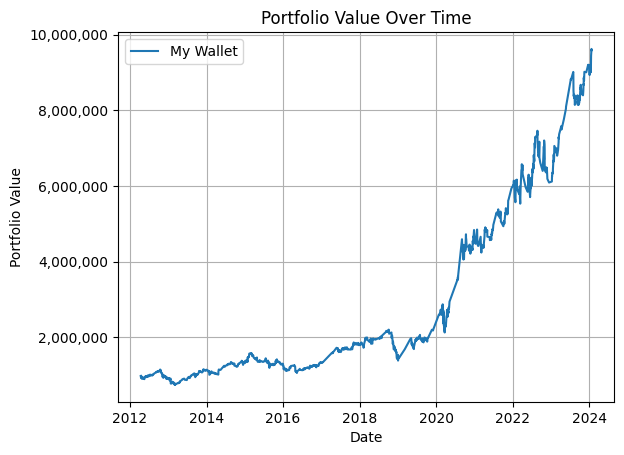

In [ ]:
w_port_uni_appl(test_aapl)

In [ ]:
from matplotlib.ticker import FuncFormatter
def w_port_uni_msft(combined_df: pd.DataFrame) -> pd.DataFrame:

    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        #if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
        #    print("my_money = ", my_wallet)
        #    break

        if   my_Middle_Band[num] > my_close[num] or my_MACD[num]>0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
             buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
             count_day = count_day + 1

             if my_Middle_Band[count_day] < my_close[count_day] or my_MACD[count_day]<0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                #print('date_to_buy',my_day[num])
                #print('date_to_sell',my_day[count_day])
                #print('buy_price =', buy)
                #print('sell =', next_buy)
                #print('diff_price =',diff_price)
                #print("my_port =",my_wallet)
                ##print('my_wallet =',my_wallet)
                #print('\n')
                num = count_day
             else:
              pass

        else:
          num = num + 1
          count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.grid(True)

    # Formatting y-axis labels
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:,.0f}".format(x)))
    plt.show()





start_day =  2012-03-28T00:00:00.000000000
my_wallet = 19,111,656


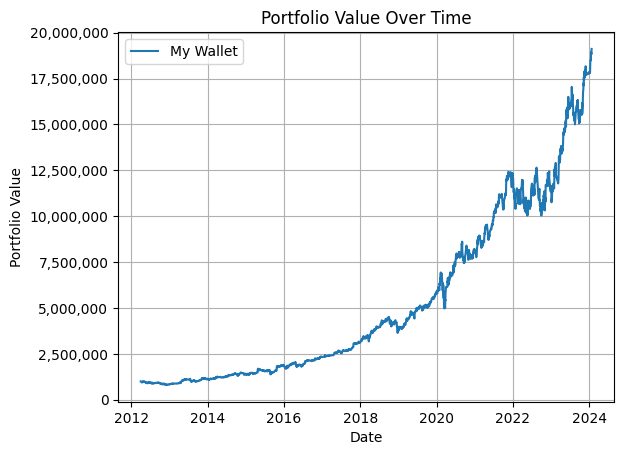

In [ ]:
w_port_uni_msft(test_msft)


# Test_Similar_Stock_Of_WMB

In [ ]:
################# Test_Similar_Stock_Of_WMB #################

#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["MPLX"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_MPLX = pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_MPLX = test_MPLX.dropna()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
################# Test_Similar_Stock_Of_WMB #################

#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["EPD"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_EPD= pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_EPD= test_EPD.dropna()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
################# Test_Similar_Stock_Of_WMB #################

#tickers = ["AAPL", "MSFT", "WMB"]
tickers = ["OKE"]
data = yf.download(tickers, start="2012-01-31", end="2024-01-25")
high = data['High']
low = data['Low']
close_prices = data['Close']

macd, _, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
tri_x = talib.TRIX(close_prices, timeperiod=14)
adx = talib.ADX(high, low, close_prices, timeperiod=14)
_, middle_band, _ = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
aroon_up, aroon_down = talib.AROON(high, low, timeperiod=14)
cci = talib.CCI(high, low, close_prices, timeperiod=14)

# Create DataFrames
df_close_prices = pd.DataFrame(close_prices, columns=["Close"])
df_macd = pd.DataFrame(macd, columns=["MACD"])
df_trix = pd.DataFrame(tri_x, columns=["TRIX"])
df_adx = pd.DataFrame(adx, columns=["ADX"])
df_middle_band = pd.DataFrame(middle_band, columns=["Middle Band"])
df_aroon_diff = pd.DataFrame(aroon_up - aroon_down, columns=["Aroon Diff"])  # Calculate the difference
df_cci = pd.DataFrame(cci, columns=["CCI"])

# Concatenate the data frames
test_OKE= pd.concat([df_close_prices,df_macd,
                       df_trix,
                       df_adx,
                       df_middle_band,
                       df_aroon_diff,
                       df_cci], axis=1)


# Drop rows with NaN values
test_OKE= test_OKE.dropna()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
test_OKE

,Close,MACD,TRIX,ADX,Middle Band,Aroon Diff,CCI
Date,,,,,,,
2012-03-28,35.821220,-0.019202,0.007539,11.730820,36.283926,42.857143,-96.779519
2012-03-29,35.847488,-0.041422,-0.001028,12.777793,36.268386,78.571429,-107.923542
2012-03-30,35.746803,-0.066391,-0.009831,13.449036,36.243653,78.571429,-79.543679
2012-04-02,35.724918,-0.086942,-0.018482,14.429582,36.210602,78.571429,-88.308984
2012-04-03,35.851864,-0.091927,-0.025741,15.340088,36.196594,78.571429,-66.341352
...,...,...,...,...,...,...,...
2024-01-18,71.250000,0.525245,0.155070,17.573747,70.427999,57.142857,14.190723
2024-01-19,70.040001,0.461477,0.142484,16.959847,70.473000,57.142857,-32.387858
2024-01-22,69.379997,0.353607,0.127449,15.860264,70.519500,57.142857,-109.977293


In [ ]:
wo_port_ADX(test_MPLX)
wo_port_MACD(test_MPLX)
wo_port_TRIX(test_MPLX)
wo_port_CCI(test_MPLX)
wo_port_Middle_Band(test_MPLX)
wo_port_Aroon_Diff(test_MPLX)

my_wallet_adx = 2.8300018310546875
my_wallet_macd = -2.1799983978271484
my_wallet_trix = -16.120010375976562
my_wallet_cci = 23.470009803771973
my_wallet_BB = -19.369998931884766
my_wallet_aroon= 24.080007553100586


In [ ]:
wo_port_ADX(test_EPD)
wo_port_MACD(test_EPD)
wo_port_TRIX(test_EPD)
wo_port_CCI(test_EPD)
wo_port_Middle_Band(test_EPD)
wo_port_Aroon_Diff(test_EPD)

my_wallet_adx = 18.399982452392578
my_wallet_macd = 0.6000080108642578
my_wallet_trix = -0.93499755859375
my_wallet_cci = 1.0900211334228516
my_wallet_BB = -2.120004653930664
my_wallet_aroon= 12.389991760253906


In [ ]:
wo_port_ADX(test_OKE)
wo_port_MACD(test_OKE)
wo_port_TRIX(test_OKE)
wo_port_CCI(test_OKE)
wo_port_Middle_Band(test_OKE)
wo_port_Aroon_Diff(test_OKE)

my_wallet_adx = 24.890945434570312
my_wallet_macd = 36.96551322937012
my_wallet_trix = 27.46063232421875
my_wallet_cci = 37.16943359375
my_wallet_BB = -31.927370071411133
my_wallet_aroon= -12.669878005981445


In [ ]:
def FN_many_indicator_corr(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values


    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        #if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
        #    print("my_money = ", my_wallet)
        #    break

        if  my_ADX[num] > 25 or my_CCI[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_ADX[count_day] < 25 or my_CCI[count_day] < 0:  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                #print('date_to_buy',my_day[num])
                #print('date_to_sell',my_day[count_day])
                #print('buy_price =', buy)
                #print('sell =', next_buy)
                #print('diff_price =',diff_price)
                #print("my_port =",my_wallet)
                ##print('my_wallet =',my_wallet)
                #print('\n')
                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)
    plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.show()

#################################################################################################################################################################################################
#################################################################################################################################################################################################




start_day =  2012-03-28T00:00:00.000000000
my_wallet = 9,590,990


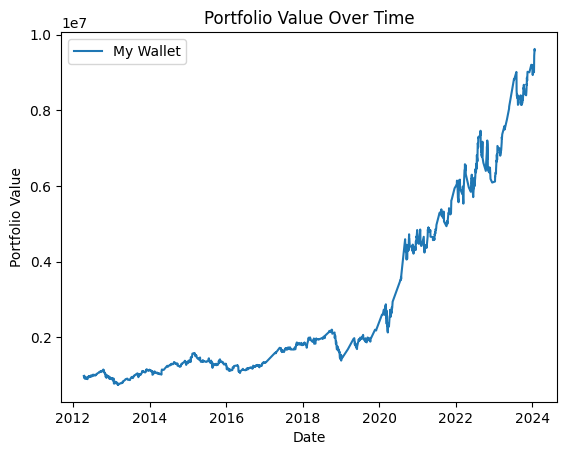

In [ ]:
FN_many_indicator_corr(test_aapl)


# Test_Other_Stock

In [ ]:
def w_port_uni_amzn(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])
    for i in range(combined_df.shape[0] - 1):
        #if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
        #    print("my_money = ", my_wallet)
        #    break

        if   my_ADX[num] > 25 or my_MACD[num] > 0 :
             buy = my_close[num]  # buy
             count_day = count_day + 1

             if my_ADX[count_day] < 25 or my_MACD[count_day] < 0 :  # sell if  -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
             else:
              pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)
    plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.grid(True)

    # Formatting y-axis labels
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:,.0f}".format(x)))
    plt.show()




In [ ]:
def w_port_uni_meta(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    my_TRIX = combined_df['TRIX'].values
    my_ADX = combined_df['ADX'].values

    my_CCI = combined_df['CCI'].values
    my_Middle_Band = combined_df['Middle Band'].values
    my_Aroon_Diff = combined_df['Aroon Diff'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])
    for i in range(combined_df.shape[0] - 1):
        #if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
        #    print("my_money = ", my_wallet)
        #    break

        if   my_Middle_Band[num] > my_close[num] or my_TRIX[num]>0 :
             buy = my_close[num]  # buy
             count_day = count_day + 1

             if my_Middle_Band[count_day] < my_close[count_day] or my_TRIX[count_day] < 0:  # sell if  -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)
                num = count_day
             else:
              pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)
    plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.title('Portfolio Value Over Time')
    plt.legend()
    plt.grid(True)

    # Formatting y-axis labels
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:,.0f}".format(x)))
    plt.show()




15596489.029221535
start_day =  2012-03-28T00:00:00.000000000
my_wallet = 20,843,809


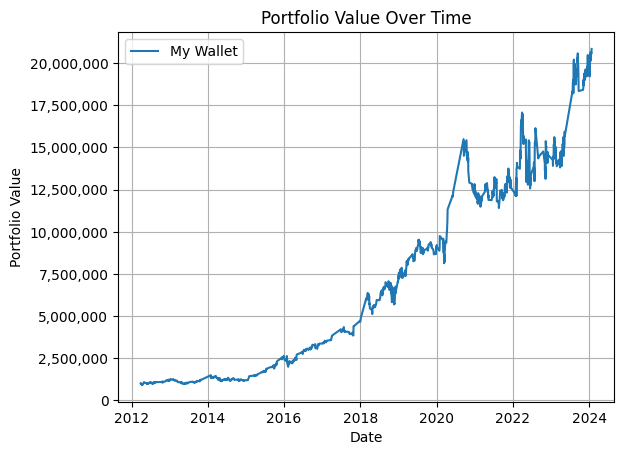

In [ ]:
#### BH  =

my_wallet =1_000_000
BH_AMZN = (test_AMZN['Close'].iloc[-1] - test_AMZN['Close'].iloc[0]) * (my_wallet//test_AMZN['Close'].iloc[0]) + my_wallet
print(BH_AMZN)
w_port_uni_amzn(test_AMZN)

13908553.81912613
start_day =  2012-07-17T00:00:00.000000000
my_wallet = 19,300,269


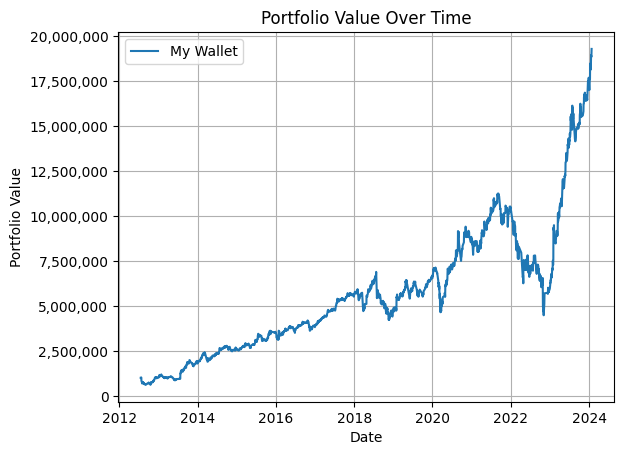

In [ ]:
my_wallet =1_000_000
BH_META = (test_META['Close'].iloc[-1] - test_META['Close'].iloc[0]) * (my_wallet//test_META['Close'].iloc[0]) + my_wallet
print(BH_META)
w_port_uni_meta(test_META)

In [ ]:
wo_port_ADX(test_AMZN)
wo_port_MACD(test_AMZN)
wo_port_TRIX(test_AMZN)
wo_port_CCI(test_AMZN)
wo_port_Middle_Band(test_AMZN)
wo_port_Aroon_Diff(test_AMZN)

my_wallet_adx = 93.64600086212158
my_wallet_macd = 109.794020652771
my_wallet_trix = 71.4699935913086
my_wallet_cci = 93.75749969482422
my_wallet_BB = 34.538479804992676
my_wallet_aroon= 59.78700923919678


In [ ]:
wo_port_ADX(test_META)
wo_port_MACD(test_META)
wo_port_TRIX(test_META)
wo_port_CCI(test_META)
wo_port_Middle_Band(test_META)
wo_port_Aroon_Diff(test_META)

my_wallet_adx = 154.38002395629883
my_wallet_macd = 256.67998123168945
my_wallet_trix = 264.48999404907227
my_wallet_cci = 112.25
my_wallet_BB = 262.0400085449219
my_wallet_aroon= 262.6301078796387
